<b>Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.</b>

Here is the code to load the data

import numpy as np

import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt

import sklearn

from sklearn.datasets import load_boston

boston = load_boston()

bos = pd.DataFrame(boston.data)

In [2]:

import numpy as np

import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt

import sklearn

from sklearn.datasets import load_boston

boston = load_boston()

bos = pd.DataFrame(boston.data)

In [4]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [9]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [57]:
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']
X.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [58]:
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [59]:
# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
print("Estimated intercept coefficient: ",lm.intercept_)
print("Number of coefficient: ",len(lm.coef_))

Estimated intercept coefficient:  36.491103280361344
Number of coefficient:  13


In [61]:
# features and estimated coefficients
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['features','estimatedcoefficients'])

,features,estimatedcoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


<function matplotlib.pyplot.show(*args, **kw)>

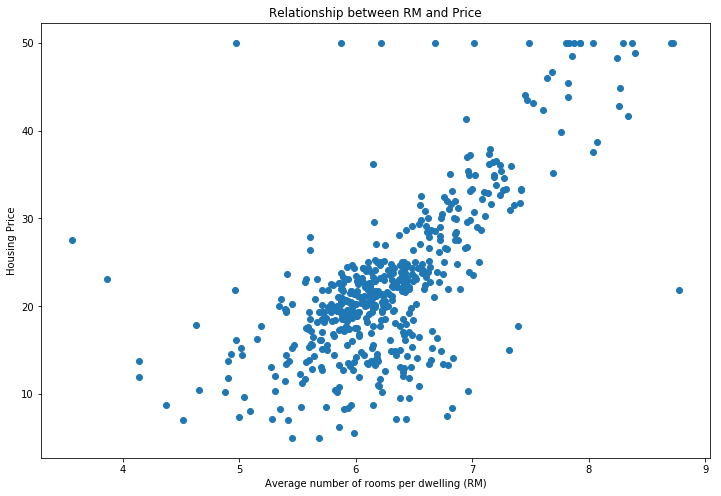

In [62]:
# AS there is a high correlation between RM and prices. Lets plot a scatter plot between True housing prices and True RM.
plt.figure(figsize=(12,8))
plt.scatter(bos.RM,bos.PRICE)
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")
plt.show



In [63]:
#Predicting Prices

lm.predict(X)[:5]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

<function matplotlib.pyplot.show(*args, **kw)>

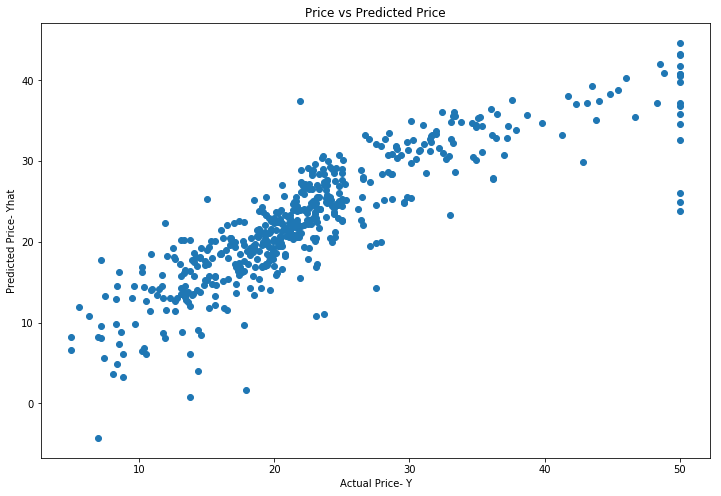

In [64]:
#scatter plot to compare true prices and the predicted prices Y VS Yhat
plt.figure(figsize=(12,8))
plt.scatter(bos.PRICE,lm.predict(X))
plt.xlabel("Actual Price- Y")
plt.ylabel("Predicted Price- Yhat")
plt.title("Price vs Predicted Price")
plt.show



In [65]:
# There are some error in the prediction when the housing prices increase
# check the mean sqare error

np.mean((bos.PRICE - lm.predict(X)) **2)



21.89777921768749

In [67]:
# predict with single feature and calculate the MSE
# MSE should be less for the best model
lm = LinearRegression()
lm.fit(X[['RM']],bos.PRICE)


np.mean((bos.PRICE - lm.predict(X[['RM']])) **2)

#The mean squared error has increased. So this shows that a single feature is not a good predictor of housing prices

43.60055177116958

In [70]:
#Training and validation data sets
#divide your data sets randomly to split Train and Test DataSet
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.15, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(430, 13)
(76, 13)
(430,)
(76,)


In [73]:
#fit and predict

lm = LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)



In [75]:
print("Calucation MSE wiith Train Data :", np.mean((Y_train - lm.predict(X_train)) ** 2))

print("Calucation MSE wiith Test Data:", np.mean((Y_test - lm.predict(X_test)) ** 2))

Calucation MSE wiith Train Data : 22.190605228634265
Calucation MSE wiith Test Data: 22.018395792365116


<function matplotlib.pyplot.show(*args, **kw)>

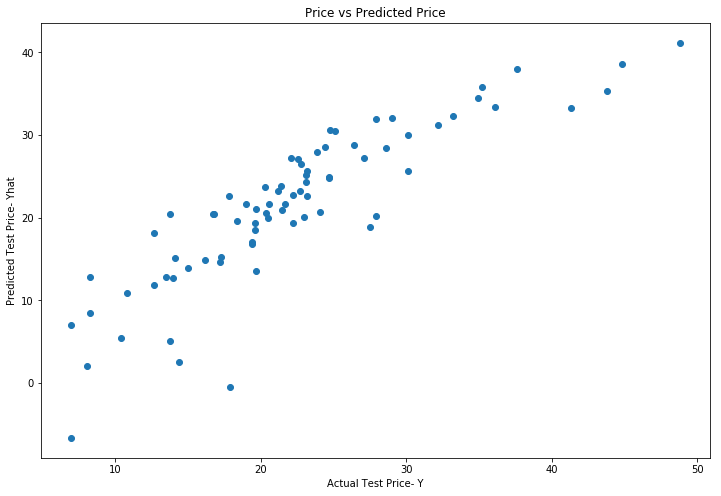

In [82]:
plt.figure(figsize=(12,8))
plt.scatter(Y_test,lm.predict(X_test))
plt.xlabel("Actual Test Price- Y")
plt.ylabel("Predicted Test Price- Yhat")
plt.title("Price vs Predicted Price")
plt.show



Text(0,0.5,'Residuals')

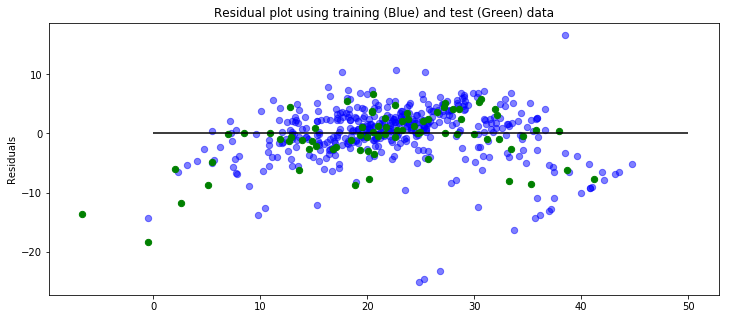

In [77]:
#Residual plots are a good way to visualize the errors in your data
#data should be randomly scattered around line zero

plt.figure(figsize=(12,5))
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b',s=40,alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g',s=40)
plt.hlines(y = 0, xmin=0, xmax=50)
plt.title("Residual plot using training (Blue) and test (Green) data")
plt.ylabel("Residuals")

<b>Conclusion</b>

1)Explored the boston data set and then renamed its column names.<br>
2)Explored the boston data set using .DESCR, my goal was to predict the housing prices using the given features.<br>
3)Used Scikit learn to fit linear regression to the entire data set and calculated the mean squared error.<br>
4)Made a train-test split and calculated the mean squared error for my training data and test data.<br>
5)Then plotted the residuals for my training and test datasets.
